Model for motor 6:


100%|██████████| 1/1 [00:08<00:00,  8.38s/it]



 New run:

testing performance, max error is: 2.698146215713327
testing performance, mean root square error is: 0.5500023880128592
testing performance, residual error > 1.495241022351575: 6.036429324100557%

 New run:

testing performance, accuracy is: 0.9637212102965528
testing performance, precision is: 0.9457547169811321
testing performance, recall: 0.6478190630048465
testing performance, F1: 0.7689357622243529




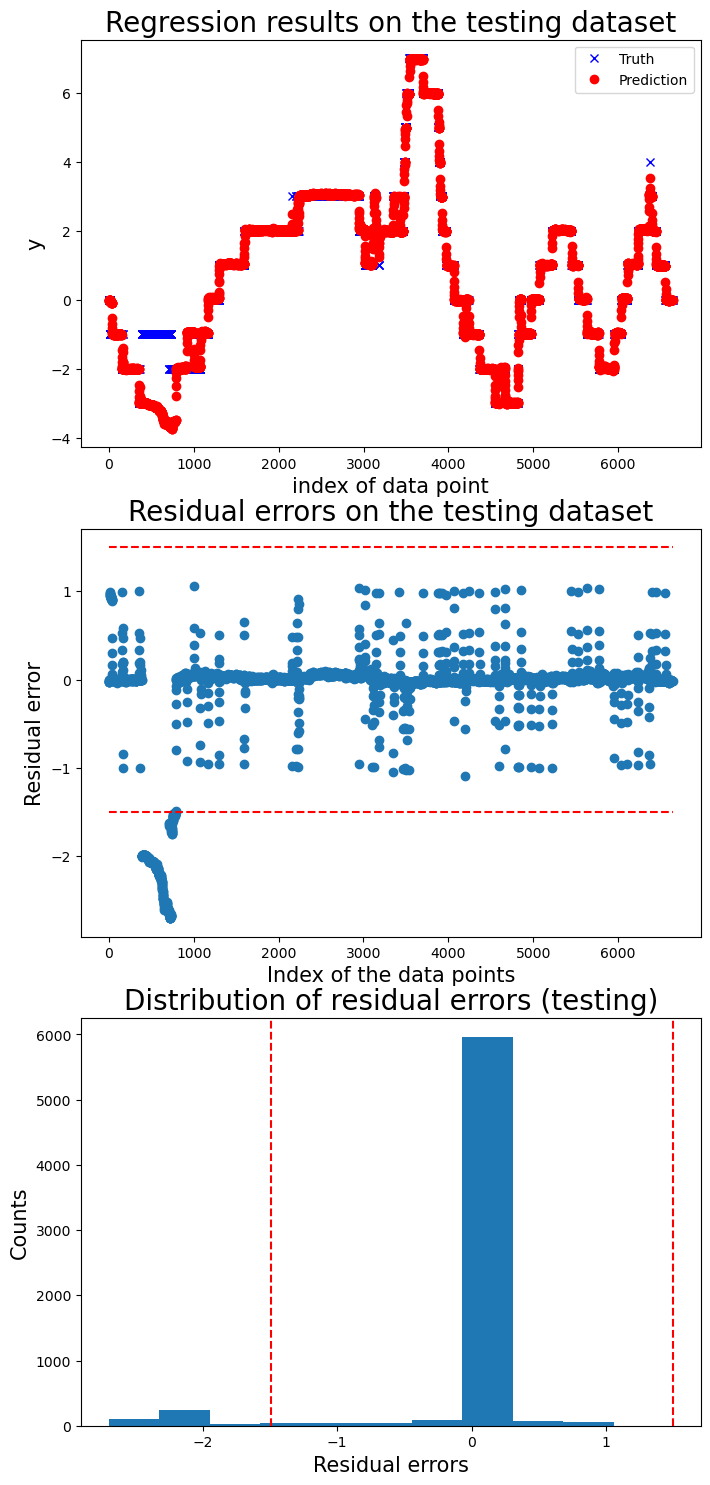

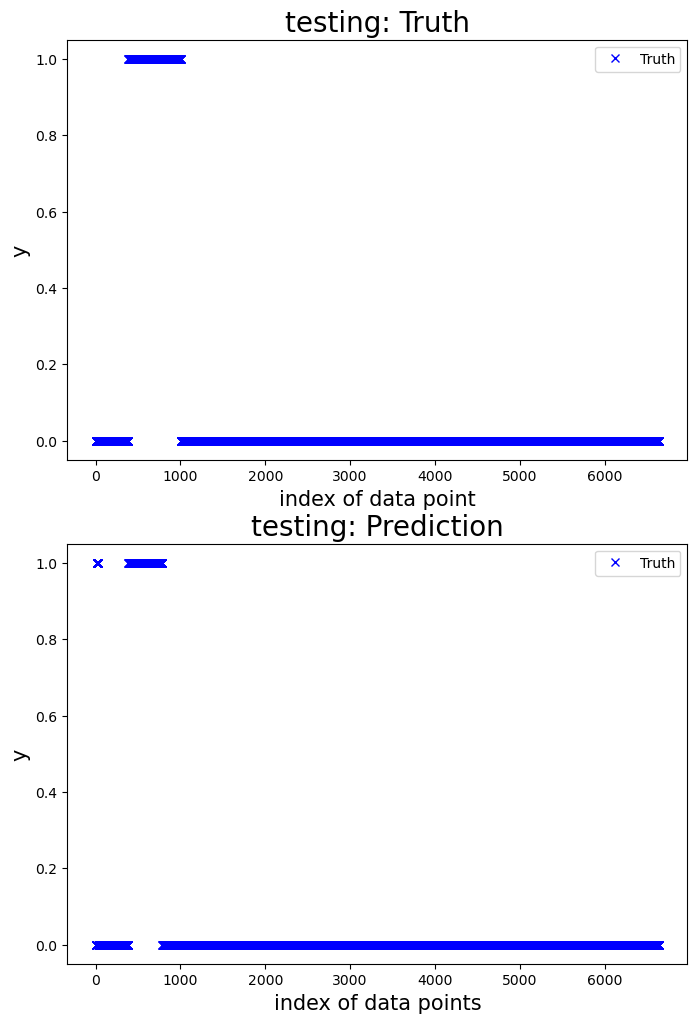

100%|██████████| 1/1 [00:00<00:00,  3.82it/s]



 New run:

testing performance, max error is: 3.905329790831563
testing performance, mean root square error is: 1.544970146205416
testing performance, residual error > 0.9: 42.792792792792795%

 New run:

testing performance, accuracy is: 0.8693693693693694
testing performance, precision is: 0.7789473684210526
testing performance, recall: 0.9024390243902439
testing performance, F1: 0.8361581920903954




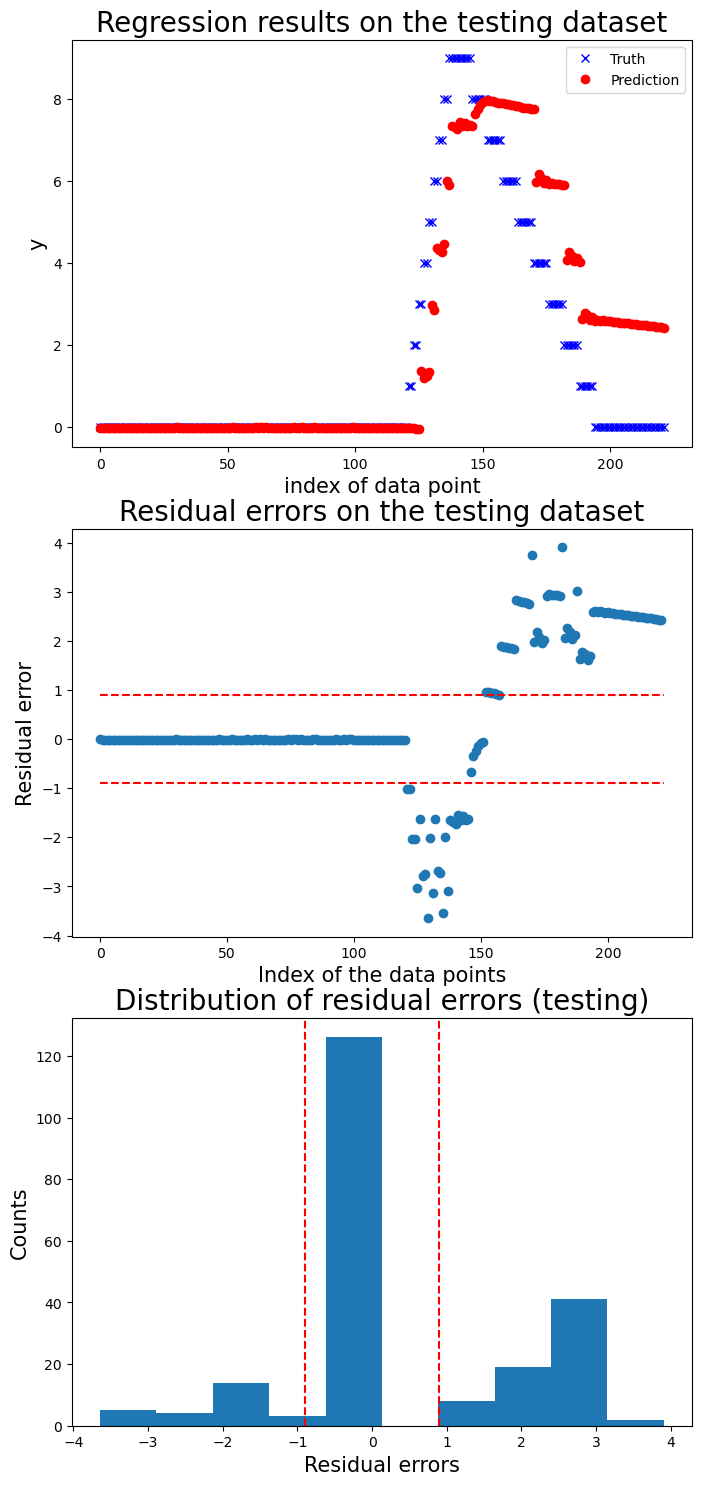

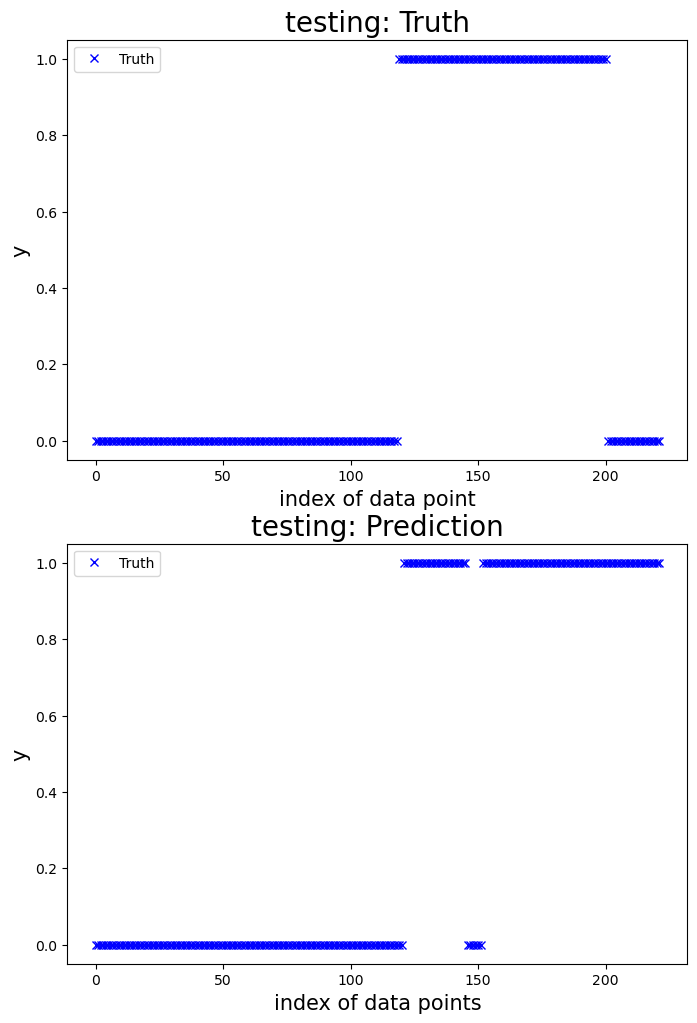

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]



 New run:

testing performance, max error is: 3.032328598405309
testing performance, mean root square error is: 0.5470881791963904
testing performance, residual error > 0.9: 19.419237749546276%

 New run:

testing performance, accuracy is: 0.8838475499092558
testing performance, precision is: 0.8037383177570093
testing performance, recall: 0.6666666666666666
testing performance, F1: 0.7288135593220338




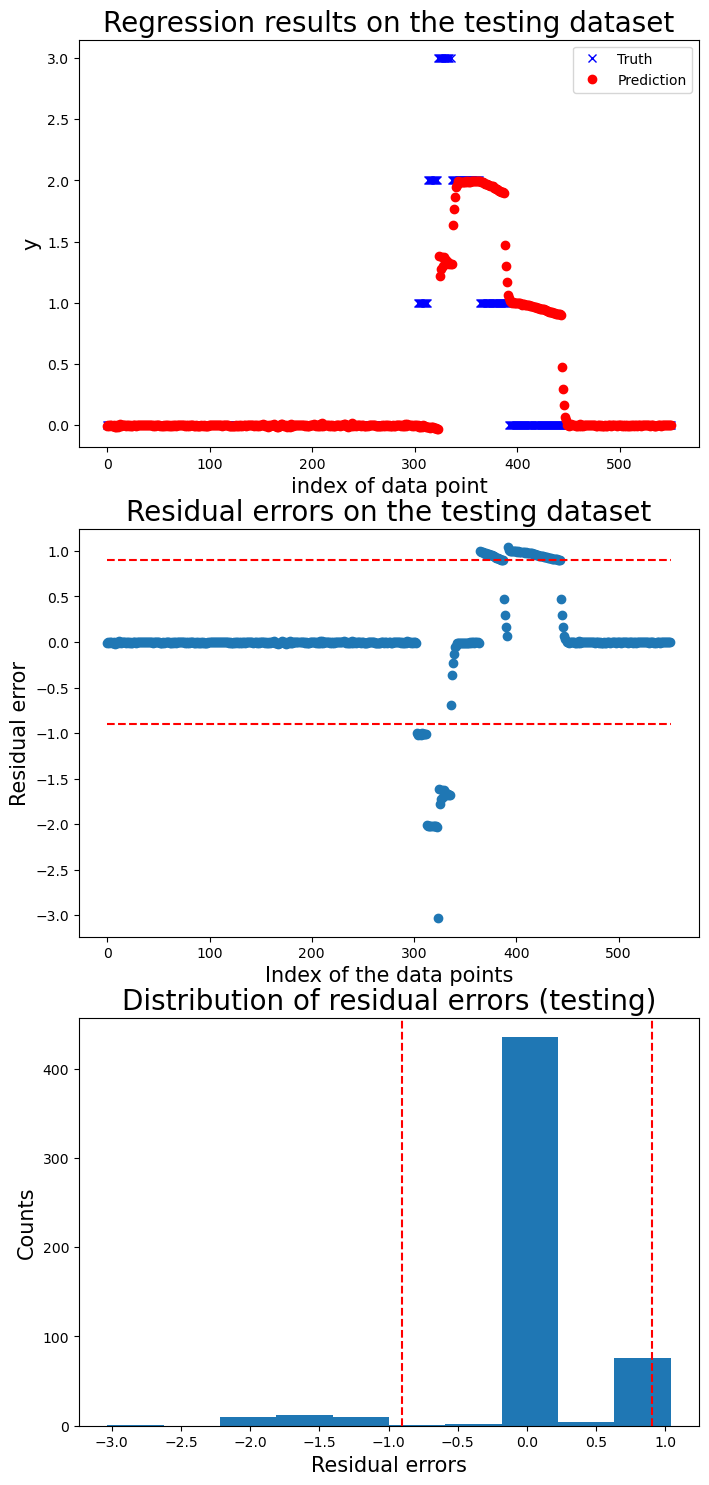

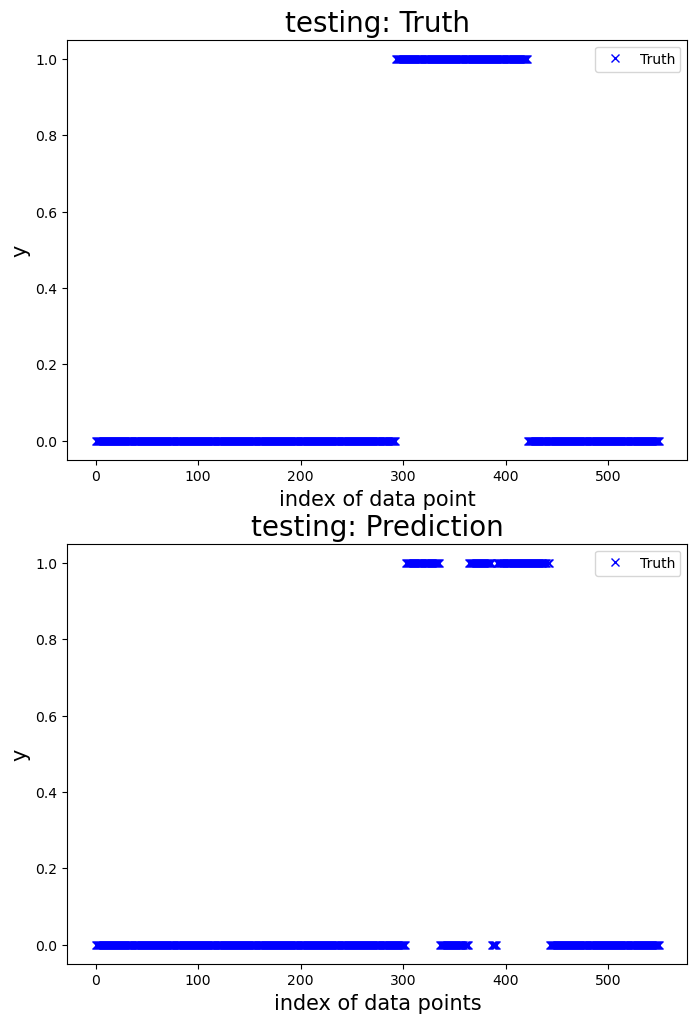

100%|██████████| 1/1 [00:01<00:00,  1.02s/it]



 New run:

testing performance, max error is: 2.039224627693245
testing performance, mean root square error is: 0.24123215366432035
testing performance, residual error > 0.9: 3.3816425120772946%

 New run:

testing performance, accuracy is: 0.9729468599033816
testing performance, precision is: 1.0
testing performance, recall: 0.5555555555555556
testing performance, F1: 0.7142857142857143




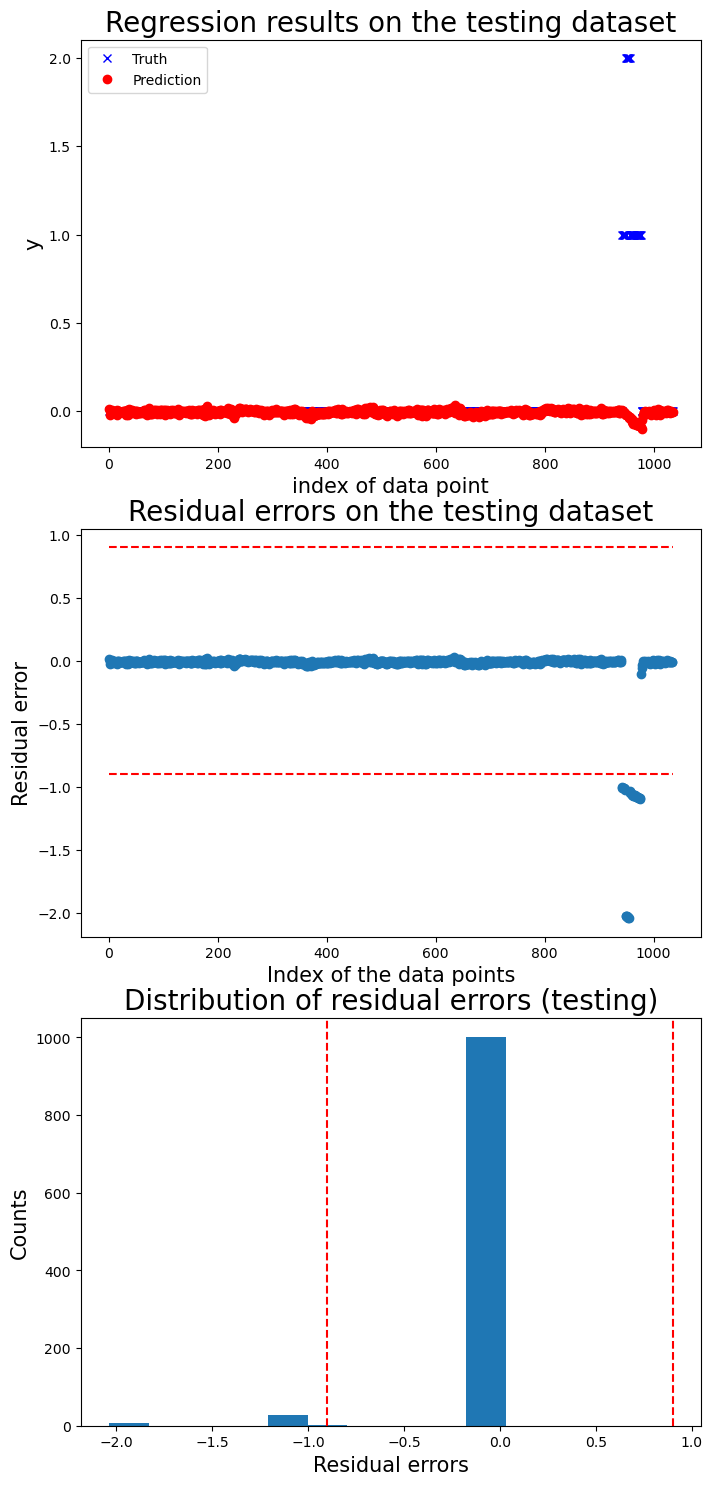

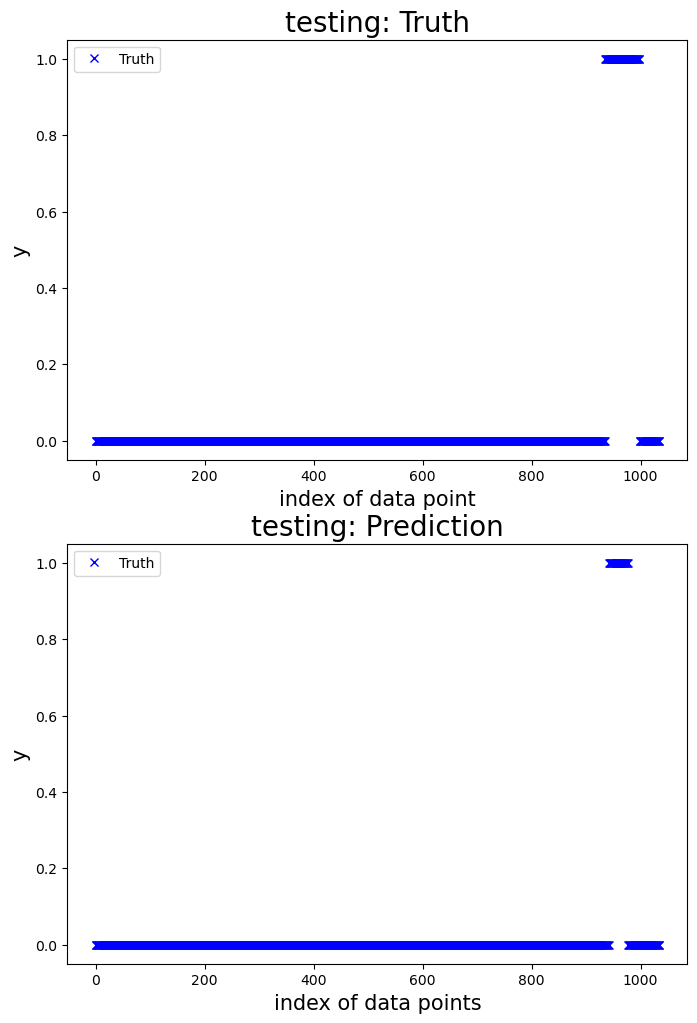

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]



 New run:

testing performance, max error is: 3.964721673370728
testing performance, mean root square error is: 1.224730984033876
testing performance, residual error > 0.9: 43.859649122807014%

 New run:

testing performance, accuracy is: 0.8061403508771929
testing performance, precision is: 0.626
testing performance, recall: 0.9020172910662824
testing performance, F1: 0.7390791027154664




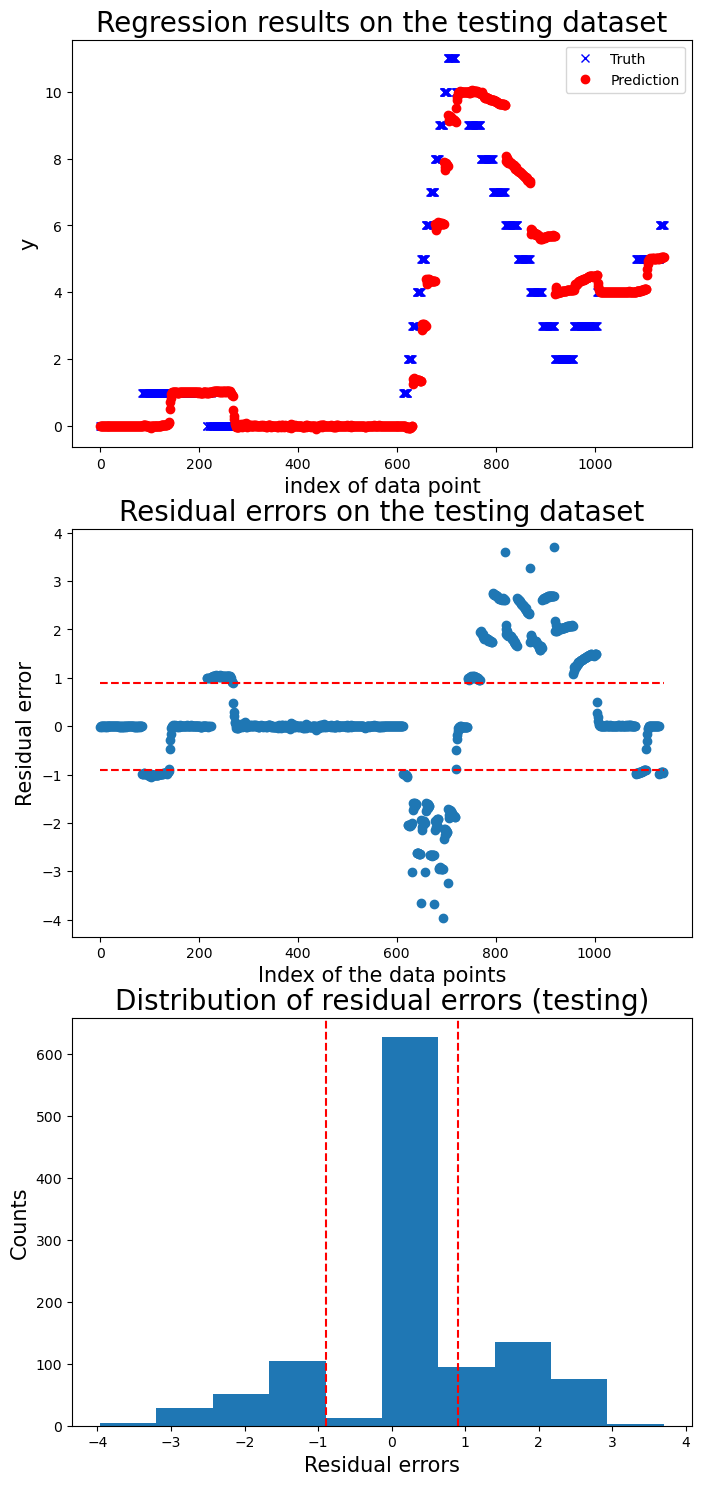

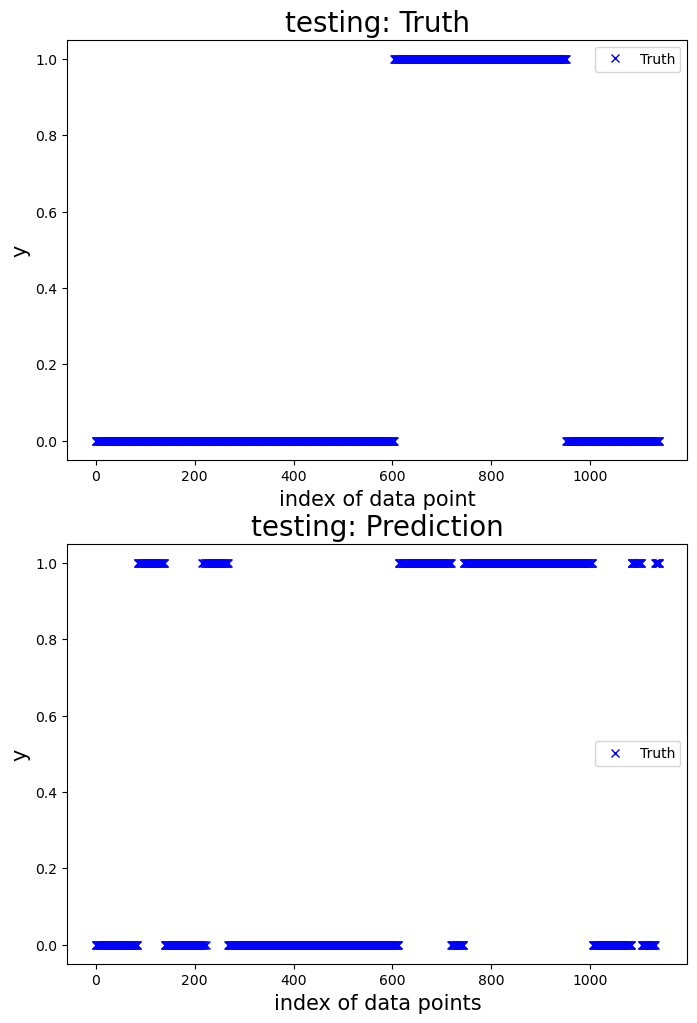

100%|██████████| 1/1 [00:00<00:00,  1.85it/s]



 New run:

testing performance, max error is: 3.9886955905042587
testing performance, mean root square error is: 1.8337589561879044
testing performance, residual error > 0.9: 67.45762711864407%

 New run:

testing performance, accuracy is: 0.7966101694915254
testing performance, precision is: 0.9522613065326633
testing performance, recall: 0.7895833333333333
testing performance, F1: 0.8633257403189066




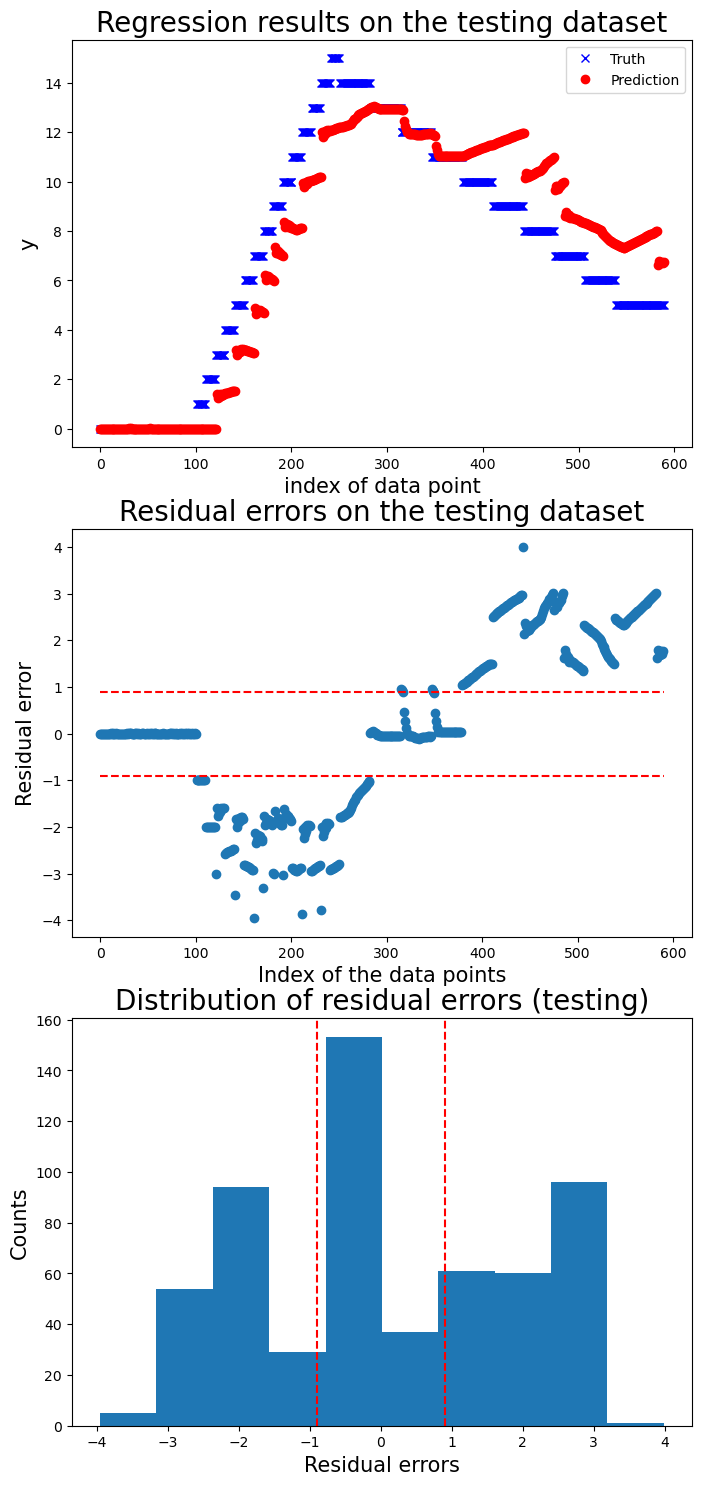

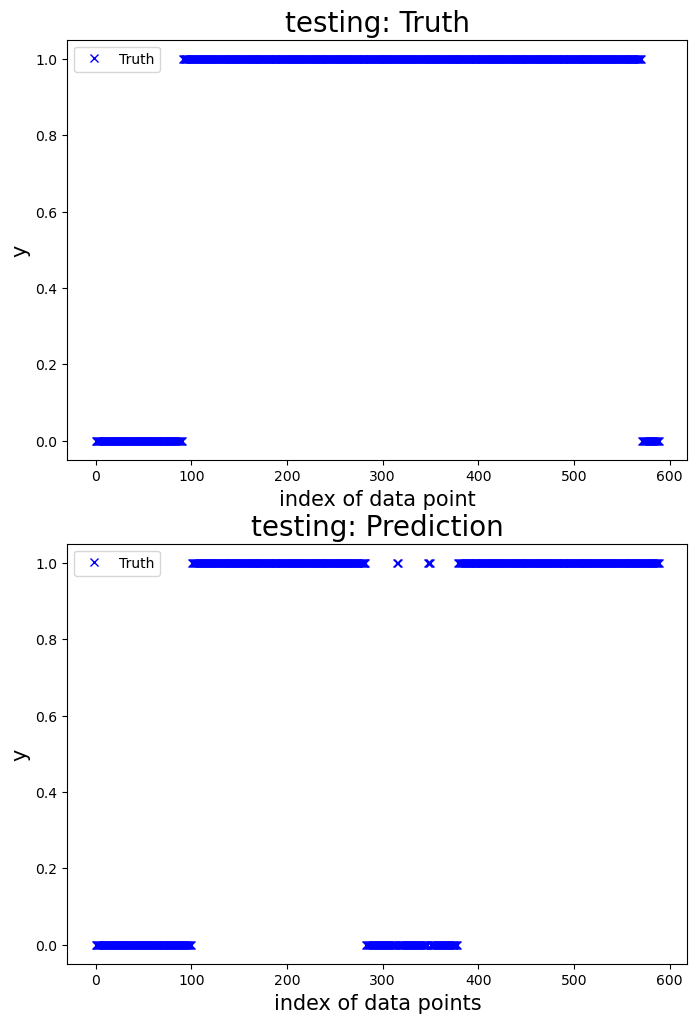

100%|██████████| 1/1 [00:00<00:00,  1.39it/s]



 New run:

testing performance, max error is: 2.9672687761118803
testing performance, mean root square error is: 1.176711189626593
testing performance, residual error > 1.401812605278645: 19.140625%

 New run:

testing performance, accuracy is: 0.5234375
testing performance, precision is: 0.15
testing performance, recall: 0.15566037735849056
testing performance, F1: 0.15277777777777776




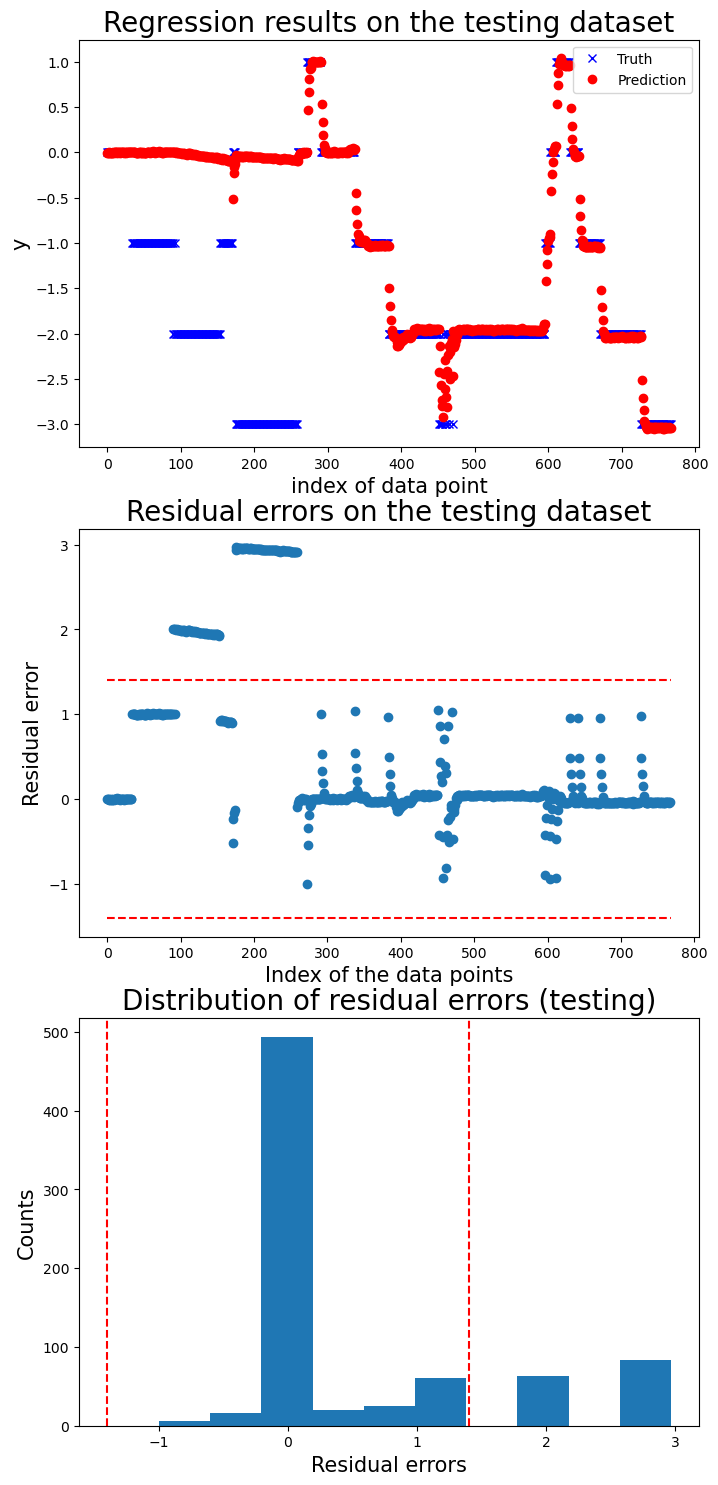

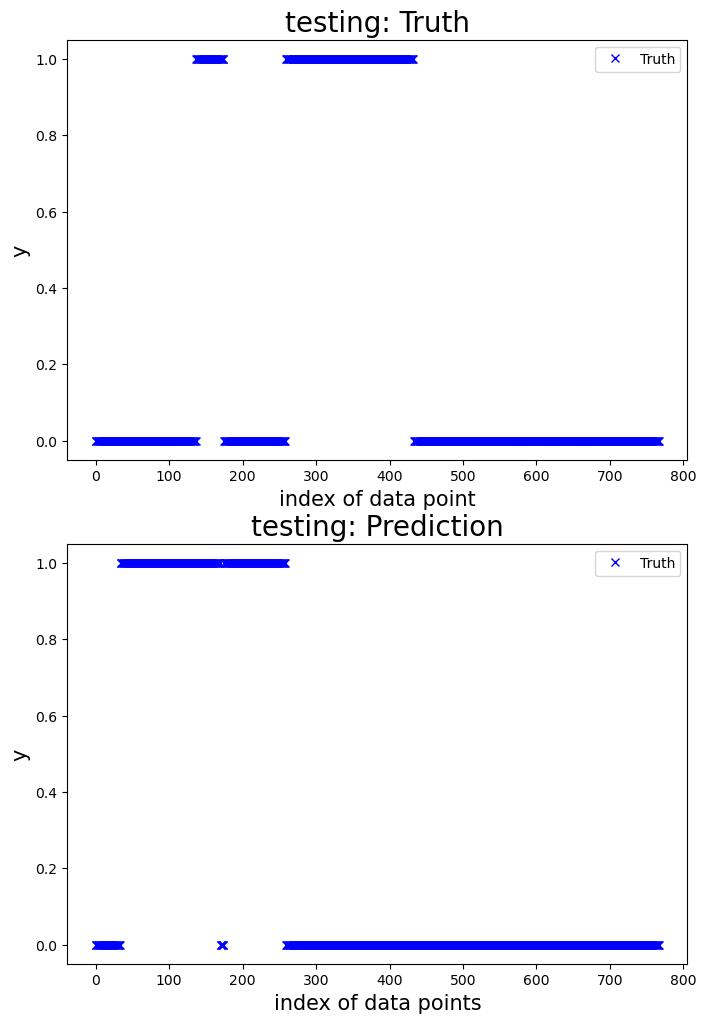

   Accuracy  Precision    Recall  F1 score
0  0.963721   0.945755  0.647819  0.768936
1  0.869369   0.778947  0.902439  0.836158
2  0.883848   0.803738  0.666667  0.728814
3  0.972947   1.000000  0.555556  0.714286
4  0.806140   0.626000  0.902017  0.739079
5  0.796610   0.952261  0.789583  0.863326
6  0.523438   0.150000  0.155660  0.152778


Mean performance metric and standard error:
Accuracy: 0.8309 +- 0.1519
Precision: 0.7510 +- 0.2946
Recall: 0.6600 +- 0.2581
F1 score: 0.6862 +- 0.2417




In [1]:
# Test the class FaultDetectReg

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import read_all_test_data_from_path, extract_selected_feature, prepare_sliding_window, FaultDetectReg


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()
    df['temperature'] = df['temperature'] - df['temperature'].iloc[0]

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()
    df['voltage'] = df['voltage'] - df['voltage'].iloc[0]

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()
    df['position'] = df['position'] - df['position'].iloc[0]


# Read data.
base_dictionary = 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# Pre-train the model.
# Get all the normal data.
normal_test_id = ['20240105_164214', 
    '20240105_165300', 
    '20240105_165972', 
    '20240320_152031', 
    '20240320_153841', 
    '20240320_155664', 
    '20240321_122650', 
    '20240325_135213',
    '20240325_152902', 
    '20240426_141190', 
    '20240426_141532', 
    '20240426_141602', 
    '20240426_141726', 
    '20240426_141938', 
    '20240426_141980', 
    '20240503_164435']

df_tr = df_data[df_data['test_condition'].isin(normal_test_id)]

feature_list_all = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# feature_list_all = ['time', 'data_motor_1_position', 
#                 'data_motor_2_position', 
#                 'data_motor_3_position', 
#                 'data_motor_4_position', 
#                 'data_motor_5_position', 
#                 'data_motor_6_position', 'data_motor_6_temperature']

# Prepare feature and response of the training dataset.
x_tr_org, y_temp_tr_org = extract_selected_feature(df_data=df_tr, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# Enrich the features based on the sliding window.
window_size = 10
sample_step = 1
prediction_lead_time = 1 
threshold = .9
abnormal_limit = 3

x_tr, y_temp_tr = prepare_sliding_window(df_x=x_tr_org, y=y_temp_tr_org, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', LinearRegression())    # Step 2: Linear Regression
]

# Create the pipeline
mdl_linear_regreession = Pipeline(steps)
# Fit the model
mdl = mdl_linear_regreession.fit(x_tr, y_temp_tr)

# Test data.
test_id = [
    '20240325_155003',
    '20240425_093699',
    '20240425_094425',
    '20240426_140055',
    '20240503_163963',
    '20240503_164675',
    '20240503_165189'
]
df_test = df_data[df_data['test_condition'].isin(test_id)]

# Define the fault detector.
detector_reg = FaultDetectReg(reg_mdl=mdl, threshold=threshold, abnormal_limit=abnormal_limit, window_size=window_size, sample_step=sample_step, pred_lead_time=prediction_lead_time)

# # Test
# _, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
# x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# # Predict the temperature
# detector_reg.threshold = 1
# y_label_pred_tr, y_temp_pred_tr = detector_reg.predict(df_x_test=x_tr_org, y_response_test=y_temp_tr_org)
# y_label_pred_tmp, y_temp_pred_tmp = detector_reg.predict(df_x_test=x_test_org, y_response_test=y_temp_test_org)

# # Get the true values.
# _, y_label_test = prepare_sliding_window(df_x=x_test_org, y=y_label_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='clf')
# _, y_temp_test_seq = prepare_sliding_window(df_x=x_test_org, y=y_temp_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')


# show_reg_result(y_tr=y_temp_tr, y_test=y_temp_test_seq, y_pred_tr=y_temp_pred_tr, y_pred=y_temp_pred_tmp, threshold=detector_reg.threshold)
# show_clf_result(y_tr=np.zeros(len(y_label_pred_tr)), y_test=y_label_test, y_pred_tr=y_label_pred_tr, y_pred=y_label_pred_tmp)

# # Run cross validation
n_fold = 7
_, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

motor_idx = 6
print(f'Model for motor {motor_idx}:')
# Run cross validation.
df_perf = detector_reg.run_cross_val(df_x=x_test_org, y_label=y_label_test_org, y_response=y_temp_test_org, 
                                        n_fold=n_fold)
print(df_perf)
print('\n')
# Print the mean performance and standard error.
print('Mean performance metric and standard error:')
for name, metric, error in zip(df_perf.columns, df_perf.mean(), df_perf.std()):
    print(f'{name}: {metric:.4f} +- {error:.4f}') 
print('\n')